In [1]:
#task..creating a model to predict diabetics status of an individual based on various exposed conditions
#we gonna use a kaggle dataset..link..

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,10)
%matplotlib inline

In [3]:
#loading the dataset
df=pd.read_csv('C://Users/sojore/Documents/diabetics pred/diabetes.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
##exploring the dataset
df.groupby('Age')['Age'].agg('count').head()

Age
16    1
25    2
26    1
27    6
28    9
Name: Age, dtype: int64

In [5]:
df.groupby('Gender')['Gender'].agg('count')

Gender
Female    192
Male      328
Name: Gender, dtype: int64

In [6]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [7]:
#converting all these categorical column values into numerical values
#we will be replacing all the Yes values with 1 ,No with 0 using the replace function for better computation
#same as for female and male values

In [8]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [9]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
#we use the replace function to replace yes and no values with 1 and 0 respectvely

In [11]:
df1=df.replace(['Yes','No'],[1,0])

In [12]:
df1.sample(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
390,47,Male,0,0,0,0,0,0,0,0,1,0,1,0,0,1,Negative
197,61,Female,1,0,0,0,1,0,0,0,1,0,0,0,1,0,Positive
144,68,Male,1,1,0,0,1,0,1,1,1,0,1,0,0,0,Positive
510,67,Male,0,0,0,1,0,0,0,1,0,1,0,0,1,0,Negative
337,55,Female,1,1,1,1,0,0,1,0,0,0,1,0,0,1,Positive


In [13]:
df2=df1.replace(['Male','Female'],[1,0])
df2.sample(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
493,44,1,1,0,1,1,0,1,0,1,0,1,0,0,1,1,Negative
254,35,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,Positive
372,72,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0,Negative
222,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,Negative
171,48,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,Positive


In [14]:
df3=df2.replace(['Positive','Negative'],[1,0])
df3.head(4)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1


In [15]:
df3.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object

In [16]:
#handling any missing values
df3.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [17]:
#our data gat no missing values
#plotting some charts to visualize the data

Text(0, 0.5, 'count')

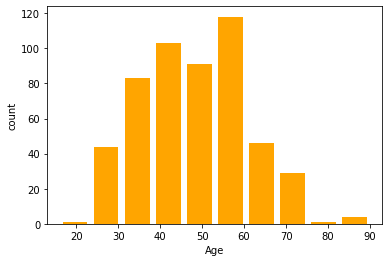

In [18]:
plt.hist(df3.Age,rwidth=0.8,color='orange')
plt.xlabel('Age')
plt.ylabel('count')

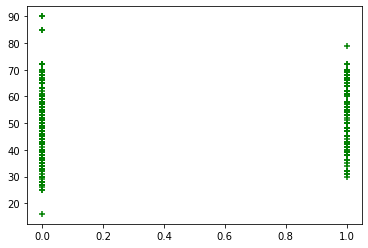

In [19]:
plt.scatter(df3.Irritability,df3.Age,marker='+',color='green')

In [20]:
##handling some outliers based on the age column
df3.Age.unique()


array([40, 58, 41, 45, 60, 55, 57, 66, 67, 70, 44, 38, 35, 61, 54, 43, 62,
       39, 48, 32, 42, 52, 53, 37, 49, 63, 30, 50, 46, 36, 51, 59, 65, 25,
       47, 28, 68, 56, 31, 85, 90, 72, 69, 79, 34, 16, 33, 64, 27, 29, 26],
      dtype=int64)

In [21]:
#we use the IQR to filter out some outliers
df3['Age2']=df3['Age']**2
df3.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age2
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1600
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,3364
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,1681
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,2025
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,3600


In [22]:
Q1=df3.Age2.quantile(0.25)
Q3=df3.Age2.quantile(0.75)
Q1,Q3

(1521.0, 3249.0)

In [23]:
IQR=Q3-Q1
IQR

1728.0

In [24]:
lower_limit=Q1-IQR*1.5
upper_limit=Q3+IQR*1.5
lower_limit,upper_limit

(-1071.0, 5841.0)

In [25]:
df4=df3.copy()
df4.shape

(520, 18)

In [26]:
df4[(df4.Age2<lower_limit) | (df4.Age2>upper_limit)]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age2
101,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,7225
102,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1,8100
113,79,1,0,1,1,1,1,1,0,1,1,0,1,0,0,0,1,6241
185,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,7225
186,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1,8100


In [27]:
df5=df4[(df4.Age2>=lower_limit) & (df4.Age2<=upper_limit)]
df5.shape

(515, 18)

Text(0, 0.5, 'count')

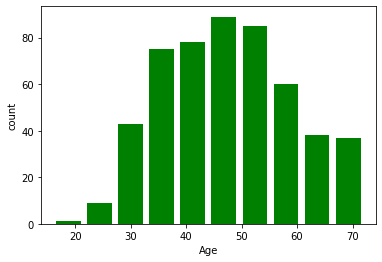

In [28]:
plt.hist(df5.Age,rwidth=0.8,color='green')
plt.xlabel('Age')
plt.ylabel('count')

In [29]:
ll=df5.Age.quantile(0.0001)
ul=df5.Age.quantile(0.9999)
ll,ul

(16.462600000000002, 72.0)

In [30]:
df5[(df5.Age<ll) | (df5.Age>ul)].head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age2
133,16,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,256


In [31]:
df6=df5[(df5.Age>=ll) & (df5.Age<=ul)]
df6.shape

(514, 18)

Text(0, 0.5, 'count')

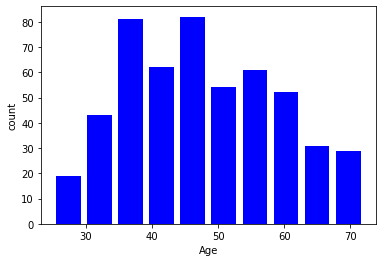

In [32]:
plt.hist(df6.Age,rwidth=0.8,color='blue')
plt.xlabel('Age')
plt.ylabel('count')

In [33]:
#my histogram kinda has a normal distribution,pretty cool
#preparing the training and test dataset

In [34]:
df7=df6.drop('Age2',axis='columns')
df7.head(3)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1


In [35]:
X=df7.drop('class',axis=1)
X.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0


In [36]:
X.shape

(514, 16)

In [37]:
y=df7['class']
y.sample(5)

177    1
334    0
293    0
238    0
303    1
Name: class, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [39]:
X_train.shape

(411, 16)

In [40]:
X_test.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
310,67,1,1,0,0,1,1,0,1,1,1,1,0,1,1,1
228,45,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0
65,40,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
355,54,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0
384,39,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1


In [41]:
#importing important libraries for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [42]:
model=keras.Sequential([
    keras.layers.Dense(16,input_dim=16,activation='relu'),
    keras.layers.Dropout(0.5),#this layer will drop 50% of the neurons-----the good practice is we put dropout layer after each
    #hidden layer
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
52/52 [==============================] - 4s 10ms/step - loss: 1.9177 - accuracy: 0.5669
Epoch 2/100
52/52 [==============================] - 0s 5ms/step - loss: 1.4698 - accuracy: 0.5985
Epoch 3/100
52/52 [==============================] - 0s 5ms/step - loss: 1.3396 - accuracy: 0.5645
Epoch 4/100
52/52 [==============================] - 0s 6ms/step - loss: 1.2379 - accuracy: 0.5693
Epoch 5/100
52/52 [==============================] - 0s 5ms/step - loss: 0.8908 - accuracy: 0.5961
Epoch 6/100
52/52 [==============================] - 0s 4ms/step - loss: 0.7774 - accuracy: 0.6010
Epoch 7/100
52/52 [==============================] - 0s 5ms/step - loss: 0.8475 - accuracy: 0.5572: 0s - loss: 0.8614 - accuracy: 0.54
Epoch 8/100
52/52 [==============================] - 0s 6ms/step - loss: 0.7981 - accuracy: 0.5912
Epoch 9/100
52/52 [==============================] - 0s 5ms/step - loss: 0.7894 - accuracy: 0.6107
Epoch 10/100
52/52 [==============================] - 0s 6ms/step - loss

52/52 [==============================] - 0s 9ms/step - loss: 0.6413 - accuracy: 0.6302
Epoch 80/100
52/52 [==============================] - 0s 8ms/step - loss: 0.6301 - accuracy: 0.6302
Epoch 81/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6309 - accuracy: 0.6302 0s - loss: 0.6415 - accura
Epoch 82/100
52/52 [==============================] - 0s 7ms/step - loss: 0.6489 - accuracy: 0.6302
Epoch 83/100
52/52 [==============================] - 0s 7ms/step - loss: 0.6343 - accuracy: 0.6302
Epoch 84/100
52/52 [==============================] - 0s 8ms/step - loss: 0.6382 - accuracy: 0.6302
Epoch 85/100
52/52 [==============================] - 0s 8ms/step - loss: 0.6312 - accuracy: 0.6302
Epoch 86/100
52/52 [==============================] - 0s 8ms/step - loss: 0.6211 - accuracy: 0.6302
Epoch 87/100
52/52 [==============================] - 0s 8ms/step - loss: 0.6207 - accuracy: 0.6302: 0s - loss: 0.5893 - accura
Epoch 88/100
52/52 [==============================] - 1s 

In [43]:
#testing the model on the test dataset
model.evaluate(X_test,y_test)

4/4 [==============================] - 3s 6ms/step - loss: 0.6328 - accuracy: 0.5340


[0.6328499913215637, 0.5339806079864502]

In [44]:
y_pred=model.predict(X_test).reshape(-1)
y_pred=np.round(y_pred)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.53      1.00      0.70        55

    accuracy                           0.53       103
   macro avg       0.27      0.50      0.35       103
weighted avg       0.29      0.53      0.37       103



C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
y_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [46]:
y_test[:10]

310    0
228    0
65     1
355    0
384    1
293    0
352    0
488    0
158    1
242    0
Name: class, dtype: int64

In [47]:
##visualizing the predicted results by ANN model

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)


Text(159.0, 0.5, 'Truth')

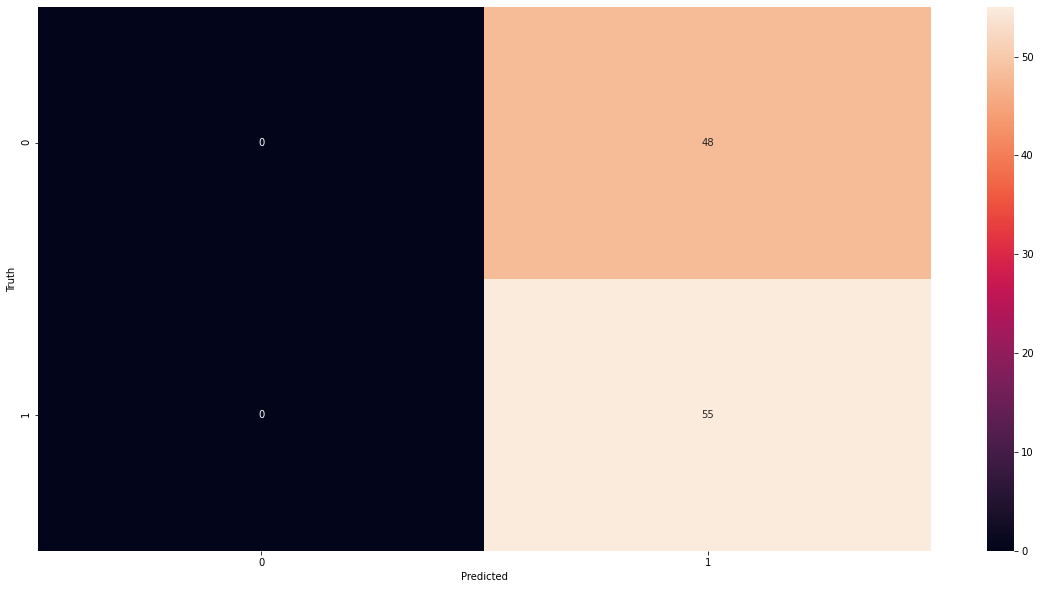

In [49]:
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
##the ANN model is not doing great in doing the correct predictions
#several ways to improve its performance is to train the ANN on a huge dataset

In [51]:
#my ANN model is not doing pretty good
#lets use machine learning algorithms to create another model and compare their perfomances

In [52]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [53]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [54]:
find_best_model_using_gridsearchcv(X_train,y_train)

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

,model,best_score,best_params
0,linear_regression,0.609351,{'normalize': False}
1,lasso,-0.002587,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.822799,"{'criterion': 'mse', 'splitter': 'best'}"
3,svm,0.906024,"{'C': 3, 'kernel': 'linear'}"
4,random_forest,0.978313,{}
5,logistic_regression,0.915663,{}


In [55]:
#from the above random forest seems to be doing pretty good,so we can use it to create our model
model1=RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
model1.score(X_test,y_test)

0.9805825242718447

In [57]:
y_predicted=model1.predict(X_test)
y_predicted[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [58]:
y_test[:10]

310    0
228    0
65     1
355    0
384    1
293    0
352    0
488    0
158    1
242    0
Name: class, dtype: int64

In [59]:
#next i will create a heatmap for a better visualization of the predicted results
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_predicted)


Text(159.0, 0.5, 'Truth')

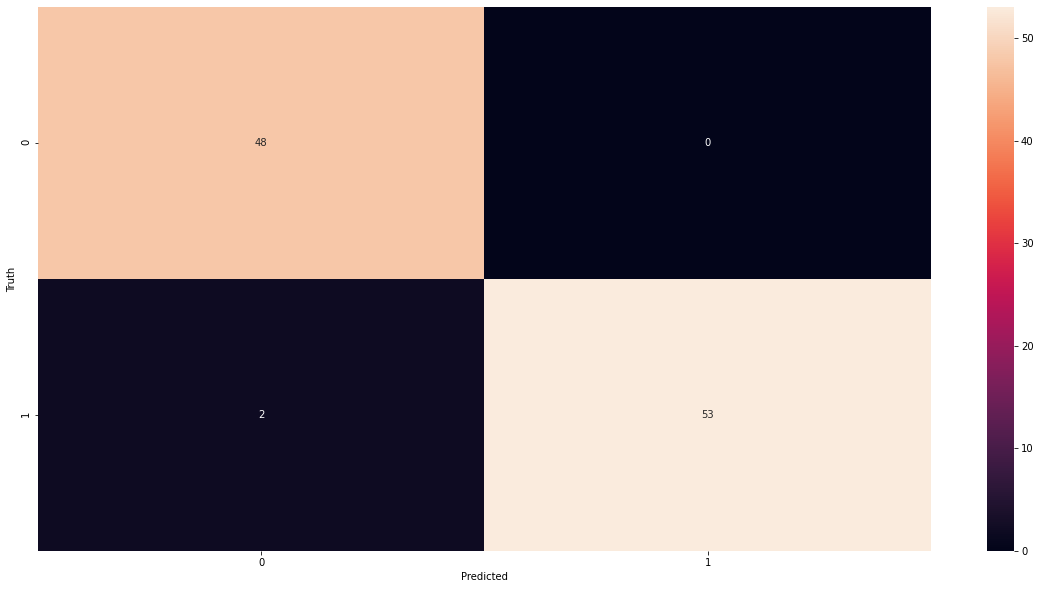

In [60]:
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
#my model1 is doing pretty good on doing the predictions
#next i can print a classification report
print('Classification Report: \n',classification_report(y_test,y_predicted))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.96      0.98        55

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103



In [62]:
###now my model1 is doing pretty good as compared to ANN model

In [63]:
# importing our model1 into a pickle file
# import pickle
# with open('diabetics_prediction.pickle','wb') as f:
#     pickle.dump(model1,f)